In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


3장 신경망

3.1 퍼셉트론에서 신경망으로

      3.1.1 신경망의 예
      3.1.2 퍼셉트론 복습
      3.1.3 활성화 함수의 등장

3.2 활성화 함수

      3.2.1 시그모이드 함수
      3.2.2 계단 함수 구현하기
      3.2.3 계단 함수의 그래프
      3.2.4 시그모이드 함수 구현하기
      3.2.5 시그모이드 함수와 계단 함수 비교
      3.2.6 비선형 함수
      3.2.7 ReLU 함수

3.3 다차원 배열의 계산

     3.3.1 다차원 배열
     3.3.2 행렬의 내적(행렬곱)
     3.3.3 신경망의 내적

3.4 3층 신경망 구현하기

     3.4.1 표기법 설명
     3.4.2 각 층의 신호 전달 구현하기
     3.4.3 구현 정리

3.5 출력층 설계하기

     3.5.1 항등 함수와 소프트맥스 함수 구현하기
     3.5.2 소프트맥스 함수 구현 시 주의점
     3.5.3 소프트맥스 함수의 특징
     3.5.4 출력층의 뉴런 수 정하기

3.6 손글씨 숫자 인식

     3.6.1 MNIST 데이터셋
     3.6.2 신경망의 추론 처리
     3.6.3 배치 처리


---

#3장 신경망

- 퍼셉트론으로 복잡한 함수 표현
- 가중치를 설정하는 작업은 사람이 수동으로 처리한다.

##3.1 퍼셉트론에서 신경망으로

차이 : 퍼셉트론 - 스텝함수, 신경망 - sigmoid 함수 사용

퍼셉트론 장점
  - 복잡한 함수도 표현할 수 있다는 것

퍼셉트론 단점
  - 가중치 작업하는 작업이 수동으로 진행(Back propagation 이 적용되지 않음)

신경망은 가중치를 자동으로 설정



image.png

###3.1.1 신경망의 예

그림 3-1 신경망의 예
  - 층구성 총 3층 : 입력출(0층) 은닉층(1층) 출력층(2층)
  - 가중치를 가지는 층수 2개 : 은닉층(1층) 출력층(2층)

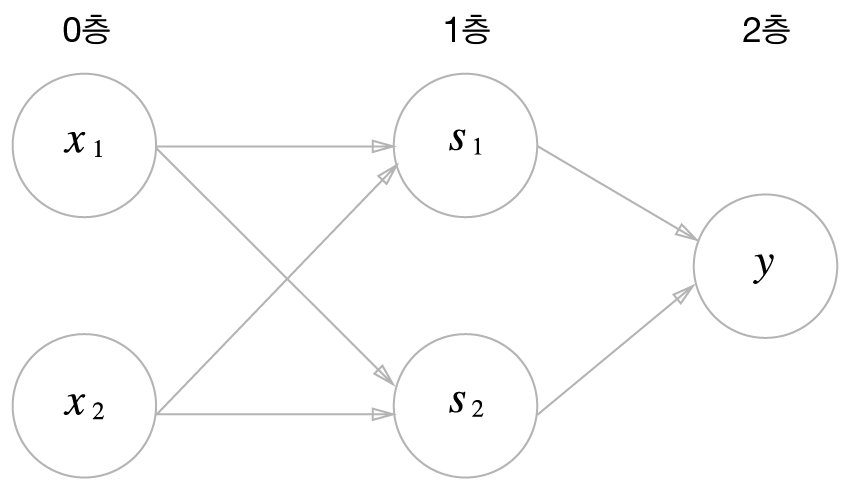

$
s_1 = h(w^1_{11} x_{1} + w^1_{12} x_{2} + b^1_1)\\
s_2 = h(w^1_{21} x_{1} + w^1_{22} x_{2} + b^1_2)\\
y = h(w^2_{1} s_{1} + w^2_{2} s_{2} + b^2)\\
$

###3.1.2 퍼셉트론 복습

그림 3-2 퍼셉트론 복습

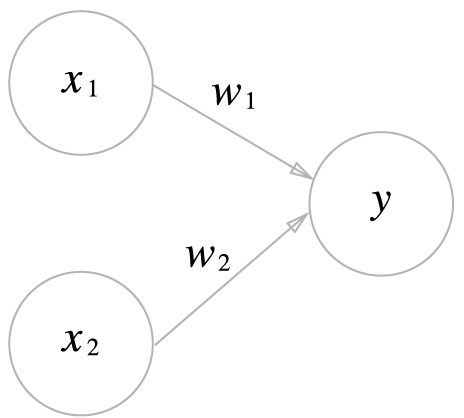

$$
 y=
\begin{cases}
0&(b + w_{1} x_{1} + w_{2} x_{2} \leq 0)\\
1&(b + w_{1} x_{1} + w_{2} x_{2} > 0)
\end{cases}
\tag*{[식 3.1]}
$$

그림 3-3 편향을 명시한 퍼셉트론
  - 편향(b) : 얼마나 쉽게 활성화되느냐 제어
  - 가중치(w1, w2) : 각 신호의 영향력 제어

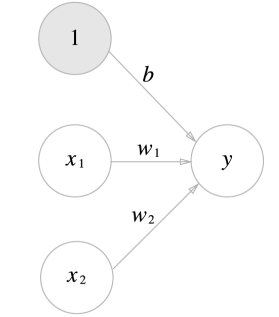

$$
y = h(b + w_1x_1 + w_2x_2)
\tag*{[식 3.2]}
$$


$$
 h(x)=
\begin{cases}
0&(h(x) \leq 0)\\
1&(h(x) > 0)
\end{cases}
\tag*{[식 3.3]}
$$

###3.1.3 활성화 함수의 등장

그림 3-4 활성화 함수의 처리 과정 - 2단계 처리 과정
  - a : 가중치가 곱해진 입력신호의 총합
  - y : 그합을 활성화 함수(h())에 입력

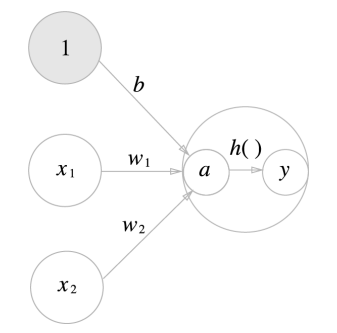

$$a = b+ w_{1} x_{1} + w_{2} x_{2}$$


$$y = h(a) = \left[\begin{array}{rrr}
0&(a \leq 0)\\
1&(a > 0)
\end{array}\right.
$$

   - a : 가중치가 달린 입력 신호와 편향의 총합
   - a를 함수 h()에 넣어 y를 출력

그림 3-5 왼쪽은 일반적인 뉴런, 오른쪽은 활성화 처리 과정을 명시한 뉴런(a는 입력 신호의 총합, h()는 활성화 함수, y는 출력)
  - 뉴런을 하나의 원으로 그린다. 하나의 노드 임
  - a와 y도 하나의 원 즉 노드이다.

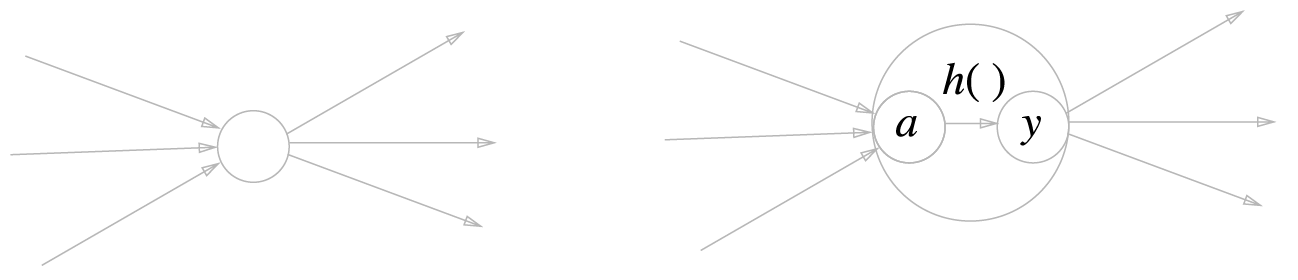

$$a = b+ w_{1} x_{1} + w_{2} x_{2}$$
$$y=h(a)$$

##3.2 활성화 함수
  - 퍼셉트론 : 계단함수
  - 신경망 : sigmoid 함수

###3.2.2 계단 함수 구현하기

Step function


In [ ]:
import numpy as np
import matplotlib.pylab as plt

In [ ]:
def step_function(x):
  if x>0:
    return 1
  else:
    return 0

#numpy 배열을 받기 위한 step function
def step_function(x):
  y = x>0
  return y.astype(np.int)

In [ ]:
#numpy용 step_function에서 y.astype(np.int)를 사용하는 이유
x = np.array([-1.0,1.0,2.0])
print(x)

y = x>0
print(y) #y는 bool type

print(y.astype(np.int)) #astype(np.int)를 통해 int형으로 형 변환

[-1.  1.  2.]
[False  True  True]
[0 1 1]


<ipython-input-3-917ca27bb93a>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(y.astype(np.int)) #astype(np.int)를 통해 int형으로 형 변환


###3.2.3 계단 함수 그래프
Step function Graph

$$h(x) = \left[\begin{array}{rrr}
0&(x \leq 0)\\
1&(x > 0)
\end{array}\right.
$$

<ipython-input-2-75889bb49114>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return y.astype(np.int)


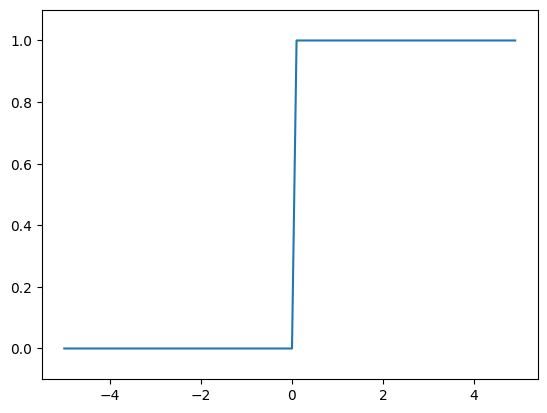

In [ ]:
x = np.arange(-5.0,5.0,0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

###3.2.4 시그모이드 함수 구현하기

Sigmoid


$$S(x) = {1\over(1+e^{-x})}$$

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [ ]:
x = np.array([-1.0,1.0,2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

Sigmoid Graph

100


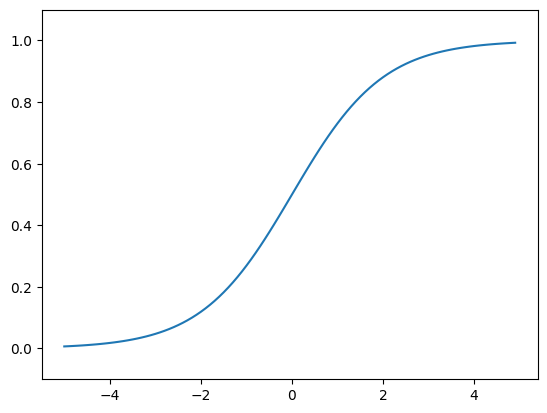

In [ ]:
x = np.arange(-5.0,5.0,0.1)
print(len(x))
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

###3.2.5 시그모이드 함수와 계단 함수 비교

Sigmoid/Step function 비교

<ipython-input-4-75889bb49114>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return y.astype(np.int)


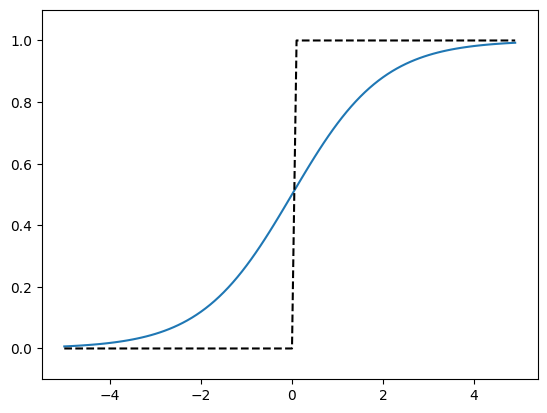

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)

y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
#plt.plot(x,0.1*x+0.5)
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

###3.2.6 비선형 함수

    선형함수만 이용하면 신경망의 층을 깊게하는 의미가 없어지지 때문입니다.

###3.2.7 ReLU 함수

    - Rectified Linear Unit


$$y=h(x) = \left[\begin{array}{rrr}
0&(x \leq 0)\\
x&(x > 0)
\end{array}\right.
$$

In [ ]:
def relu(x):
  return np.maximum(0,x)    # 0과 x를 비교하여 최대값 반환. 즉 음수면 0, 양수면 x 반환

ReLU Graph

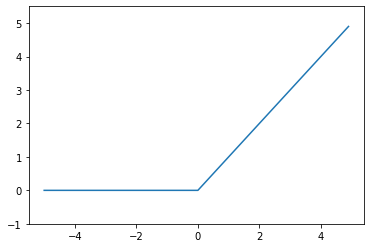

In [ ]:
x = np.arange(-5.0,5.0,0.1)
y = relu(x)
plt.plot(x,y)
plt.ylim(-1.0,5.5)
plt.show()

STEP 함수(활성함수)에 Weight SUM 적용하기

$$a = b+ w_{1} x_{1} + w_{2} x_{2}$$

$$y=h(a) = \left[\begin{array}{rrr}
0&(a \leq 0)\\
1&(a > 0)
\end{array}\right.
$$

In [ ]:
def step_function_withwb(w,x,b):
  y = (w*x+b)>0
  return y.astype(np.int)

<ipython-input-34-e4eeda81c4f8>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return y.astype(np.int)


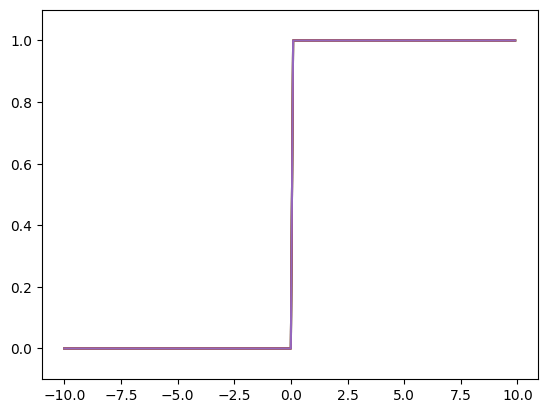

In [ ]:
# W에 의한 스텝 함수 출력 - 스텝 기울기에 영향을 미치지 않음
x = np.arange(-10.0,10.0,0.1)          # 입력 -10 ~ 10사이의 x값 간격 0.1

y = step_function_withwb(1, x, 0)      # 파란색 W=1
plt.plot(x,y)                          # x 값에 대한 y 값을 구한다.

y2 = step_function_withwb(0.3, x, 0)   # 주황색 W=0.3
plt.plot(x,y2)                         # x 값에 대한 y2 값을 구한다.

y3 = step_function_withwb(0.5, x, 0)   # 녹색   W=0.5
plt.plot(x,y3)                         # x 값에 대한 y3 값을 구한다.

y4 = step_function_withwb(2, x, 0)     # 빨간색 W=2
plt.plot(x,y4)                         # x 값에 대한 y4 값을 구한다.

y5 = step_function_withwb(10, x, 0)    # 보라색 W=10
plt.plot(x,y5)                         # x 값에 대한 y5 값을 구한다.

plt.ylim(-0.1,1.1)                     # y의 출력 범위 설정(-1 ~ 1)
plt.show()                             # 화면에 출력

  - w갑은 기울기(미분)의 값에 영향을 받지 않는다. (미분값이 없기 자동미분을 할 수 없다.)

<ipython-input-34-e4eeda81c4f8>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return y.astype(np.int)


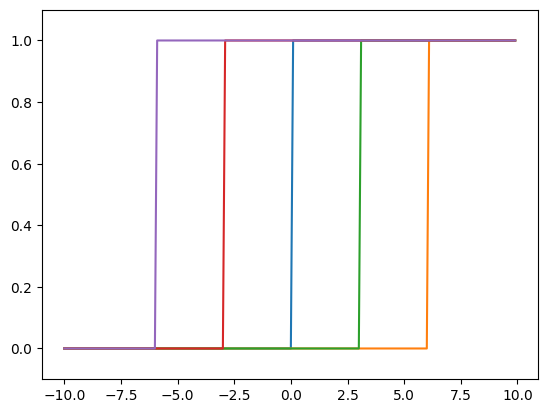

In [ ]:
# B에 의한 스텝 함수 출력 - 스텝의 x축에 영향을 미침
x = np.arange(-10.0,10.0,0.1)          # 입력 -10 ~ 10사이의 x값 간격 0.1

y = step_function_withwb(1, x, 0)      # 파란색 B=0
plt.plot(x,y)                          # x 값에 대한 y 값을 구한다.

y2 = step_function_withwb(1, x, -6)    # 주황색 B=-6 6만큼 x축 이동
plt.plot(x,y2)                         # x 값에 대한 y2 값을 구한다.

y3 = step_function_withwb(1, x, -3)    # 녹색   B=-3 3만큼 x축 이동
plt.plot(x,y3)                         # x 값에 대한 y3 값을 구한다.

y4 = step_function_withwb(1, x, 3)     # 빨간색 B=3 -3만큼 x축 이동
plt.plot(x,y4)                         # x 값에 대한 y4 값을 구한다.

y5 = step_function_withwb(1, x, 6)     # 보라색 B=6 -6만큼 x축 이동
plt.plot(x,y5)                         # x 값에 대한 y5 값을 구한다.

plt.ylim(-0.1,1.1)                     # y의 출력 범위 설정(-1 ~ 1)
plt.show()                             # 화면에 출력

활성화 함수(시그모이드)


$$S(x) = {1\over(1+e^{-x})}$$

weight sum과 활성화 함수를 결합한 수식

$$a(x) = wx + b$$

$$S(a(x)) = {1\over(1+e^{-(wx+b)})}$$

In [ ]:
def sigmoid_withwb(w,x,b):
  return 1/(1+np.exp(-(x*w+b)))

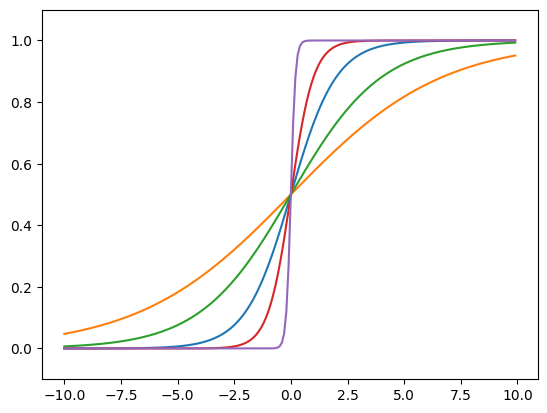

In [ ]:
# W에 의한 시그모이드 함수 출력 - 시그모이드의 기울기에 영향을 미침
x = np.arange(-10.0,10.0,0.1)    # 입력 -10 ~ 10사이의 x값 간격 0.1

y = sigmoid_withwb(1, x, 0)      # 파란색 W=1
plt.plot(x,y)                    # x 값에 대한 y 값을 구한다.

y2 = sigmoid_withwb(0.3, x, 0)   # 주황색 W=0.3
plt.plot(x,y2)                   # x 값에 대한 y2 값을 구한다.

y3 = sigmoid_withwb(0.5, x, 0)   # 녹색   W=0.5
plt.plot(x,y3)                   # x 값에 대한 y3 값을 구한다.

y4 = sigmoid_withwb(2, x, 0)     # 빨간색 W=2
plt.plot(x,y4)                   # x 값에 대한 y4 값을 구한다.

y5 = sigmoid_withwb(10, x, 0)    # 보라색 W=10
plt.plot(x,y5)                   # x 값에 대한 y5 값을 구한다.

plt.ylim(-0.1,1.1)               # y의 출력 범위 설정(-1 ~ 1)
plt.show()                       # 화면에 출력

  - 가급적이면 w갑이 작아야 기울기(미분)의 값이 풍성해 진다.
  - w값이 커지면 입력값이 제한을 받아서 vanishing gradient 문제가 발생할 수 있다
  - w값이 큰 값에 지배를 받을 수 있기 때문에 w값을 커지는 것을 억제해야 한다.

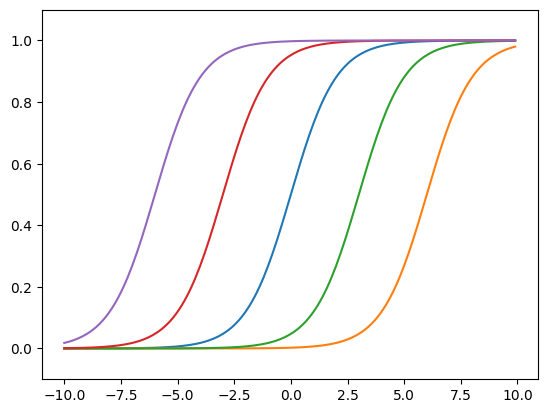

In [ ]:
# B에 의한 시그모이드 함수 출력 - 시그모이드의 x축에 영향을 미침
x = np.arange(-10.0,10.0,0.1)    # 입력 -10 ~ 10사이의 x값 간격 0.1

y = sigmoid_withwb(1, x, 0)      # 파란색 B=0
plt.plot(x,y)                    # x 값에 대한 y 값을 구한다.

y2 = sigmoid_withwb(1, x, -6)    # 주황색 B=-6 6만큼 x축 이동
plt.plot(x,y2)                   # x 값에 대한 y2 값을 구한다.

y3 = sigmoid_withwb(1, x, -3)    # 녹색   B=-3 3만큼 x축 이동
plt.plot(x,y3)                   # x 값에 대한 y3 값을 구한다.

y4 = sigmoid_withwb(1, x, 3)     # 빨간색 B=3 -3만큼 x축 이동
plt.plot(x,y4)                   # x 값에 대한 y4 값을 구한다.

y5 = sigmoid_withwb(1, x, 6)     # 보라색 B=6 -6만큼 x축 이동
plt.plot(x,y5)                   # x 값에 대한 y5 값을 구한다.

plt.ylim(-0.1,1.1)               # y의 출력 범위 설정(-1 ~ 1)
plt.show()                       # 화면에 출력

$$a = b+ w_{1} x_{1} + w_{2} x_{2}$$


$$y=h(a) = \left[\begin{array}{rrr}
0&(a \leq 0)\\
a&(a > 0)
\end{array}\right.
$$

In [ ]:
def relu_withwb(w, x, b):
  return np.maximum(0,w*x+b)    # 0과 wx+b를 비교하여 최대값 반환. 즉 음수면 0, 양수면 x 반환

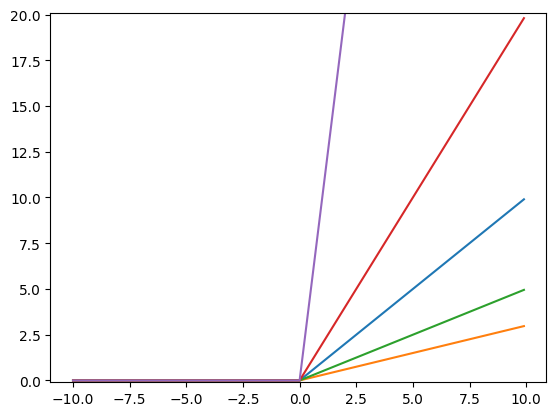

In [ ]:
# W에 의한 ReLU 함수 출력 - ReLU의 기울기에 영향을 미침
x = np.arange(-10.0,10.0,0.1)    # 입력 -10 ~ 10사이의 x값 간격 0.1

y = relu_withwb(1, x, 0)         # 파란색 W=1
plt.plot(x,y)                    # x 값에 대한 y 값을 구한다.

y2 = relu_withwb(0.3, x, 0)      # 주황색 W=0.3
plt.plot(x,y2)                   # x 값에 대한 y2 값을 구한다.

y3 = relu_withwb(0.5, x, 0)      # 녹색   W=0.5
plt.plot(x,y3)                   # x 값에 대한 y3 값을 구한다.

y4 = relu_withwb(2, x, 0)        # 빨간색 W=2
plt.plot(x,y4)                   # x 값에 대한 y4 값을 구한다.

y5 = relu_withwb(10, x, 0)       # 보라색 W=10
plt.plot(x,y5)                   # x 값에 대한 y5 값을 구한다.

plt.ylim(-0.1,20.1)              # y의 출력 범위 설정(-1 ~ 1)
plt.show()                       # 화면에 출력

  - 가급적이면 w갑이 작아야 기울기(미분)의 값이 풍성해 진다.
  - w값이 커지면 입력값이 제한을 받아서 vanishing gradient 문제가 발생할 수 있다.
  - w값이 큰 값에 지배를 받을 수 있기 때문에 w값을 커지는 것을 억제해야 한다.

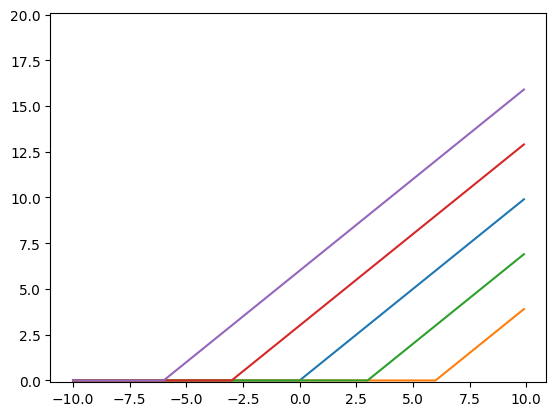

In [ ]:
# B에 의한 ReLU 함수 출력 - ReLU의 x축에 영향을 미침
x = np.arange(-10.0,10.0,0.1)    # 입력 -10 ~ 10사이의 x값 간격 0.1

y = relu_withwb(1, x, 0)         # 파란색 B=0
plt.plot(x,y)                    # x 값에 대한 y 값을 구한다.

y2 = relu_withwb(1, x, -6)       # 주황색 B=-6 6만큼 x축 이동
plt.plot(x,y2)                   # x 값에 대한 y2 값을 구한다.

y3 = relu_withwb(1, x, -3)       # 녹색   B=-3 3만큼 x축 이동
plt.plot(x,y3)                   # x 값에 대한 y3 값을 구한다.

y4 = relu_withwb(1, x, 3)        # 빨간색 B=3 -3만큼 x축 이동
plt.plot(x,y4)                   # x 값에 대한 y4 값을 구한다.

y5 = relu_withwb(1, x, 6)        # 보라색 B=6 -6만큼 x축 이동
plt.plot(x,y5)                   # x 값에 대한 y5 값을 구한다.

plt.ylim(-0.1,20.1)               # y의 출력 범위 설정(-1 ~ 1)
plt.show()                       # 화면에 출력

##3.3 다차원 배열의 계산
  - rank(차원)
  - shape
  - type

Tensor
* 데이터 표현을 위한 기본 구조로 텐서(tensor)를 사용
* 텐서는 데이터를 담기위한 컨테이너(container)로서 일반적으로 수치형 데이터를 저장

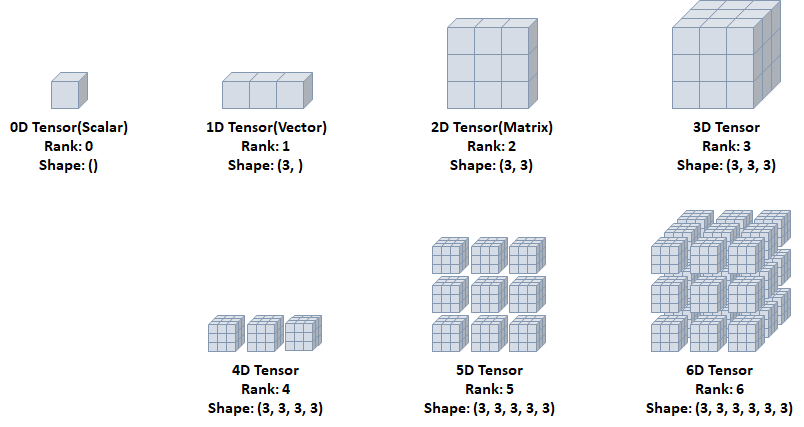

###3.3.1 다차원 배열

0차원
  - 0차원 tensor(scalar)

$
5
$

In [ ]:
import numpy as np
A = np.array(5)
print(A.ndim)
print(A.shape)
print(A.dtype)
print(A)

0
()
int64
5


In [ ]:
print(dir(A))   # dir은 변수 instance에 있는 method와 attribute를 출력한다.

['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__class_getitem__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__dlpack__', '__dlpack_device__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '

In [ ]:
# @title
print(type(A))  # type은 변수의 type을 출력한다.

<class 'numpy.ndarray'>


1차원 배열
   - 1차원 tensor(vector)


$\left(\begin{array}{r}
1&2&3&4\end{array}\right)$

In [ ]:
import numpy as np
B = np.array([1,2,3,4])
print(B.ndim)
print(B.shape)
print(B.dtype)
print(B)

1
(4,)
int64
[1 2 3 4]


2차원 배열
   - 2차원 tensor(matrix)

- 3 x 2 행렬

$\left(\begin{array}{rr}
1&2\\
3&4\\
5&6
\end{array}\right)$

In [ ]:
B = np.array([[1,2],[3,4],[5,6]])
print(B.ndim)
print(B.shape)
print(B.dtype)
print(B)


2
(3, 2)
int64
[[1 2]
 [3 4]
 [5 6]]


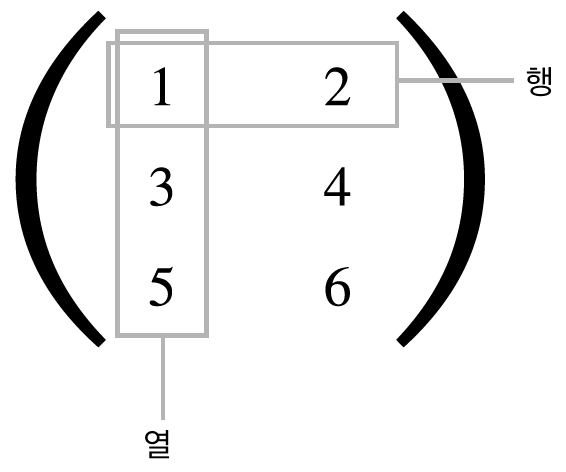

###3.3.2 행렬의 내적(행렬 곱)

https://www.mscroggs.co.uk/img/full/multiply_matrices.gif

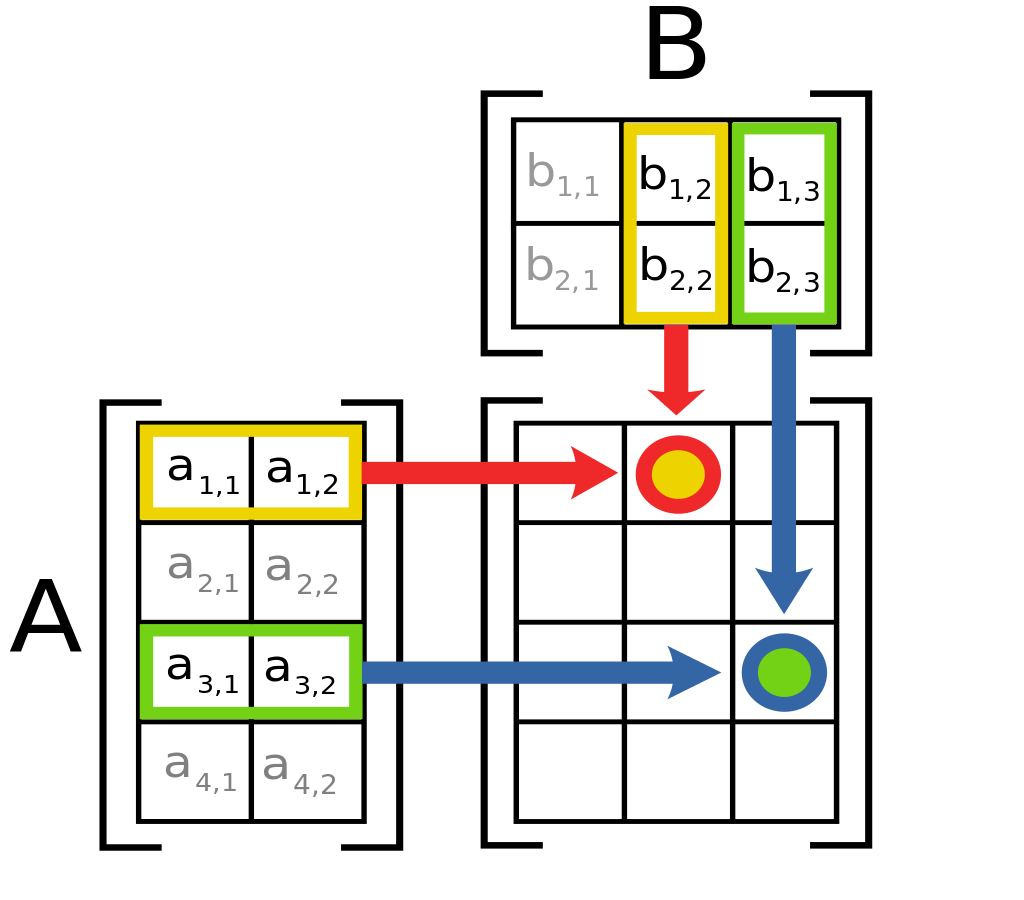

https://www.youtube.com/watch?v=OKK6t1xunpk

- 행렬곱 연습

$\left(\begin{array}{rr}
1&2\\
3&4
\end{array}\right)
\left(\begin{array}{rr}
5&6\\
7&8
\end{array}\right)$

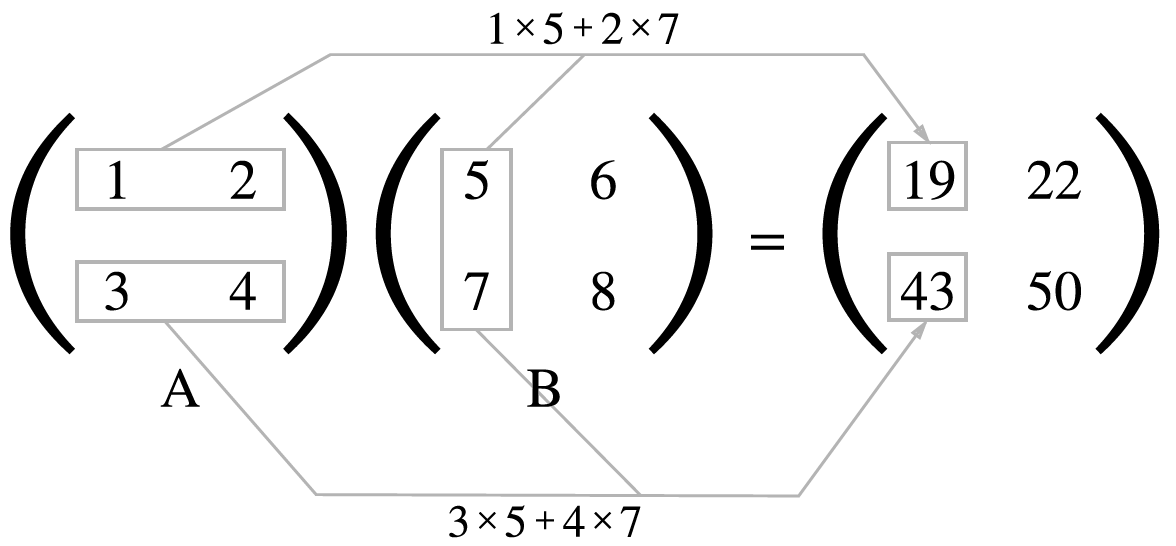

In [ ]:
A = np.array([[1,2],[3,4]])
print(A.ndim)
print(A.shape)
print(A.dtype)
B = np.array([[5,6],[7,4]])
print(B.ndim)
print(B.shape)
print(B.dtype)

print(np.dot(A,B))       #A 와 B 내적
#print(np.matmul(A,B))   #(2, 2)(2, 2) --> (2, 2)

2
(2, 2)
int64
2
(2, 2)
int64
[[19 14]
 [43 34]]



- 행렬곱 연습

$
\left(\begin{array}{rr}
1&2&3\\
4&5&6
\end{array}\right)
\left(\begin{array}{rrr}
1&2\\
3&4\\
5&6
\end{array}\right)
=
\left(\begin{array}{rr}
22&28\\
49&64\\
\end{array}\right)
$

In [ ]:
A = np.array([[1,2,3], [4,5,6]])
print(A.ndim)
print(A.shape)
print(A.dtype)
B = np.array([[1,2],[3,4],[5,6]])
print(B.ndim)
print(B.shape)
print(B.dtype)

#print(np.dot(A,B))      #A 와 B 내적
print(np.matmul(A,B))    #(2, 3)(3, 2) --> (2, 2)

2
(2, 3)
int64
2
(3, 2)
int64
[[22 28]
 [49 64]]
[[22 28]
 [49 64]]



- 행렬곱 연습

$
\left(\begin{array}{rr}
1&2\\
2&1\\
1&2
\end{array}\right)
\left(\begin{array}{rrr}
1&2&1&2\\
2&3&2&3\\
\end{array}\right)
=
\left(\begin{array}{rr}
5&8&5&8\\
4&7&4&7\\
5&8&5&8\\
\end{array}\right)
$

In [ ]:
A = np.array([[1,2], [2,1], [1,2]])
print(A.ndim)
print(A.shape)
print(A.dtype)
B = np.array([[1,2,1,2],[2,3,2,3]])
print(B.ndim)
print(B.shape)
print(B.dtype)

#print(np.dot(A,B))      #A 와 B 내적
print(np.matmul(A,B))    #(3, 2)(2, 4) --> (3, 4)

2
(3, 2)
int64
2
(2, 4)
int64
[[5 8 5 8]
 [4 7 4 7]
 [5 8 5 8]]



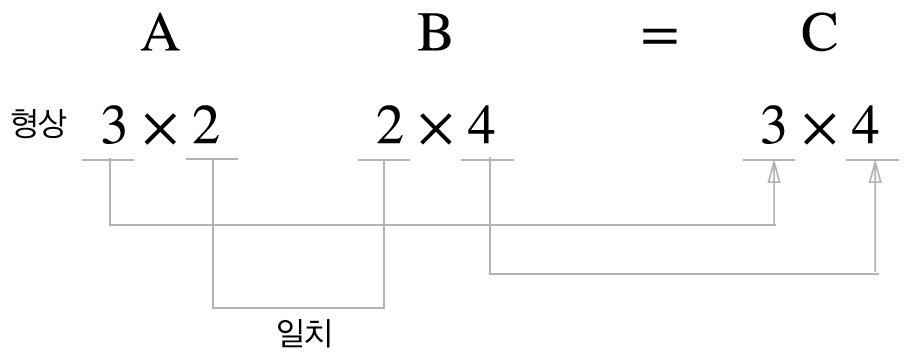

- 행렬곱 연습

$
\left(\begin{array}{rr}
1&2\\
2&1\\
1&2\\
\end{array}\right)
\left(\begin{array}{rrr}
1\\
2\\
\end{array}\right)
=
\left(\begin{array}{rr}
5\\
4\\
5\\
\end{array}\right)
$

(3, 2)(2, 1) --> (3, 1)

In [ ]:
A = np.array([[1,2], [2,1], [1,2]])
print(A.ndim)
print(A.shape)
print(A.dtype)
B = np.array([[1],[2]])
print(B.ndim)
print(B.shape)
print(B.dtype)

#print(np.dot(A,B))      #A 와 B 내적
print(np.matmul(A,B))    #(3, 2)(2, 1) --> (3, 1)

(2, 2)
W:
[[1]
 [2]]
(2, 1)
[[5]
 [4]
 [5]]


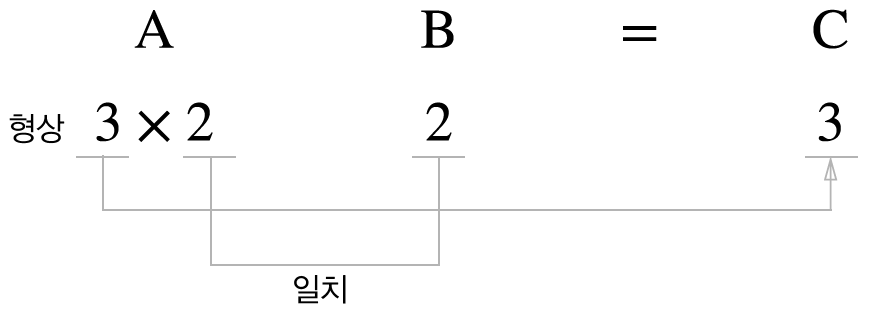

###3.3.3 신경망 내적

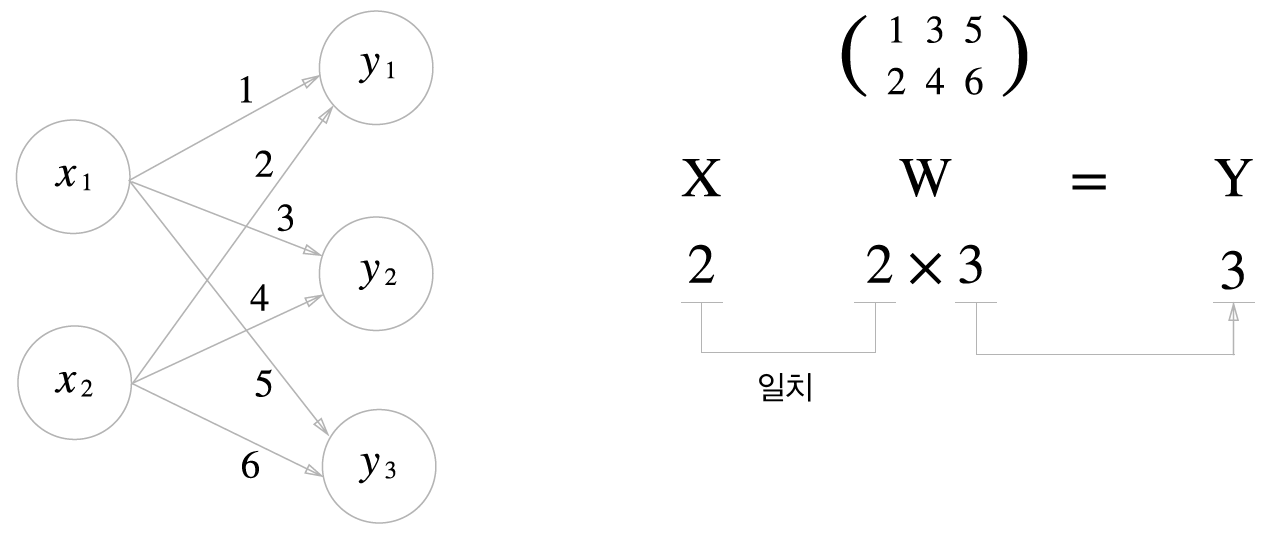

- X : 입력
- Y : 파라미터

$
\left(\begin{array}{rr}
1&2\\
\end{array}\right)
\left(\begin{array}{rrr}
1&3&5\\
2&4&6\\
\end{array}\right)
=
\left(\begin{array}{rr}
5&11&17\\
\end{array}\right)
$

In [ ]:
x = np.array([[1,2]])    #(1, 2)
print(x.shape)
W = np.array([[1,3,5],[2,4,6]])     #(2, 3)
print("W:")
print(W)
print(W.shape)
#y = np.dot(x,W) #x 와 W 내적
y = np.matmul(x,W)
print(y)

(1, 2)
W:
[[1 3 5]
 [2 4 6]]
(2, 3)
[[ 5 11 17]]


##3.4 3층 신경망 구현하기

그림 3-15 3층 신경망 : 입력층(0층)은 2개, 첫 번째 은닉층(1층)은 3개, 두번째 은닉층(2층)은 2개, 출력층(3층)은 2개의 뉴런으로 구성된다.

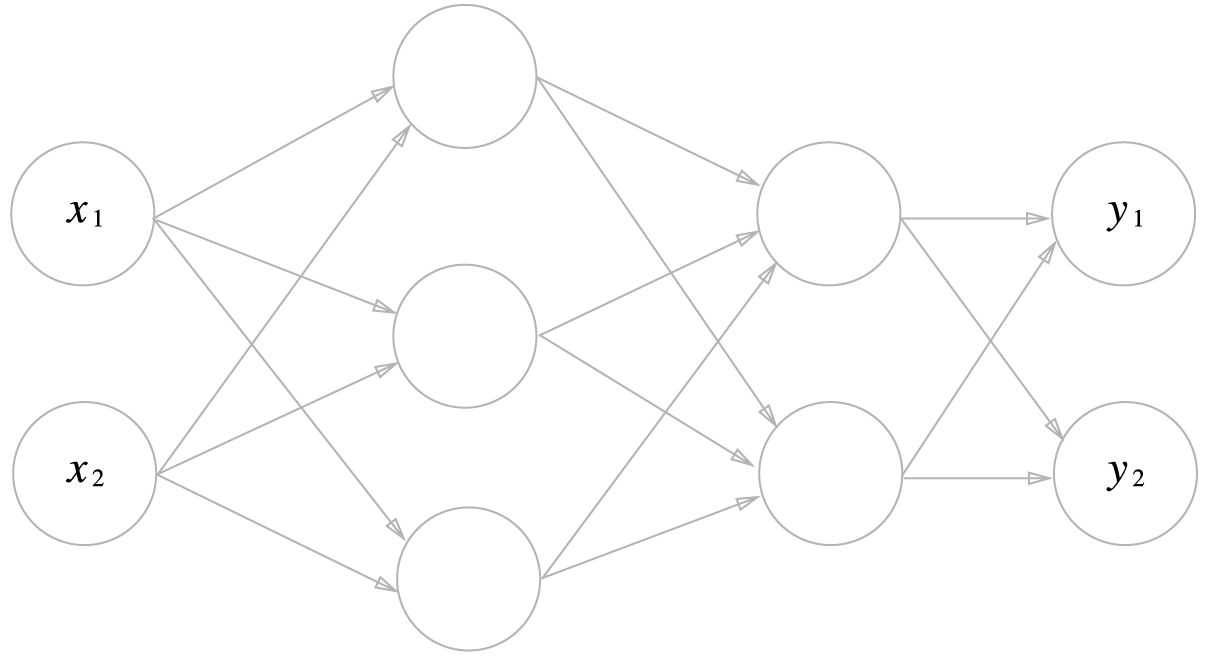

###3.4.1 표기법 설명

그림 3-16 중요한 표기


$
\left(\begin{array}{rr}
1&2\\
\end{array}\right)
\left(\begin{array}{rrr}
1&3&5\\
2&4&6\\
\end{array}\right)
=
\left(\begin{array}{rr}
5&11&17\\
\end{array}\right)
$

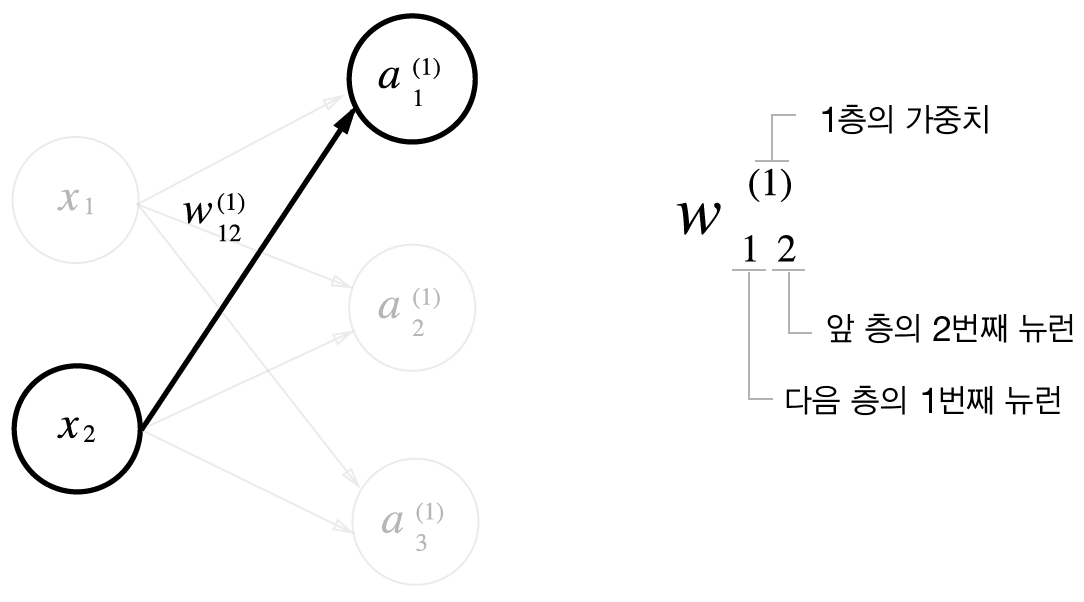

###3.4.2 각 층의 신호 전달 구현하기

그림 3-17 입력층에서 1층으로 신호 전달

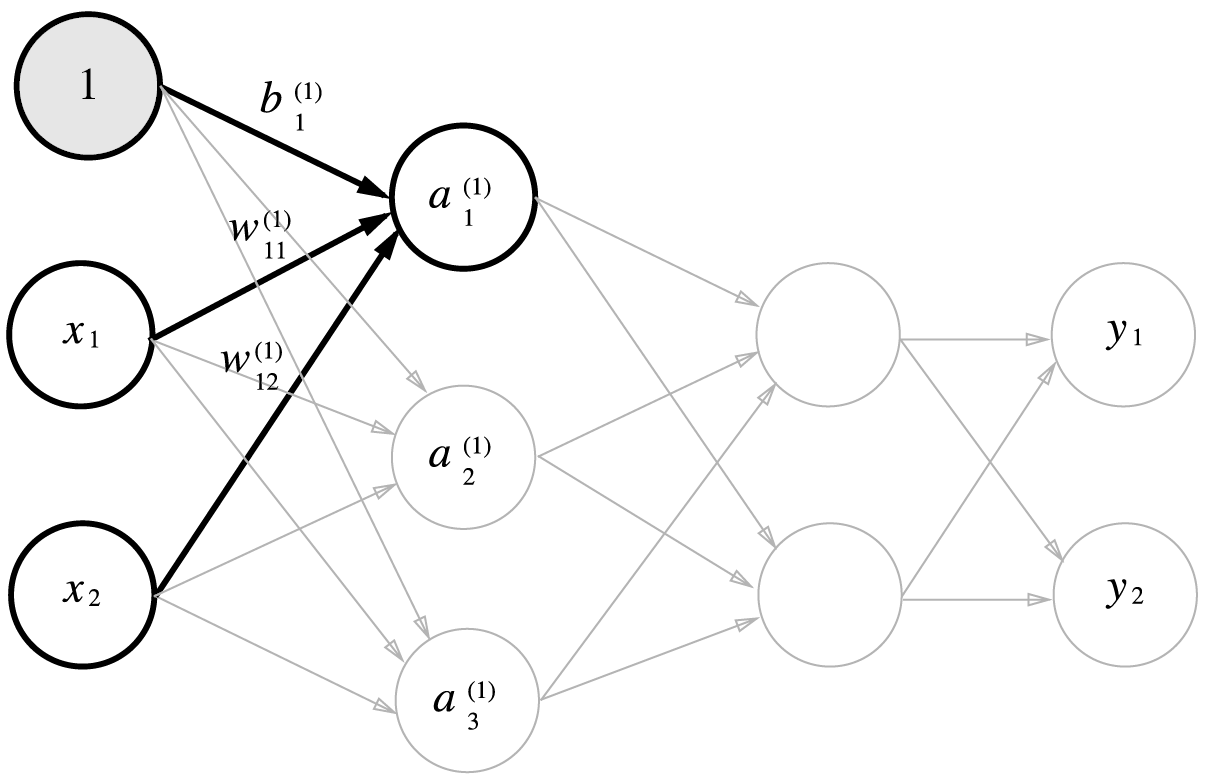

$a^{(1)}_1 = w^{(1)}_{11}x_1 + w^{(1)}_{12}x_2 + b^{(1)}_1$



$A^{(1)} = XW^{(1)} + B^{(1)}$






$A^{(1)} =  \left(a^{(1)}_{1}   a^{(1)}_{2} a^{(1)}_3\right),$
$X^{(1)} =  \left(x_1   x_2 \right),$
$B^{(1)} =  \left(b^{(1)}_{1}   b^{(1)}_{2} b^{(1)}_3\right) $


$
W^{(1)}=
\left(\begin{array}{rrr}
w^{(1)}_{11}&w^{(1)}_{21}&w^{(1)}_{31}\\
w^{(1)}_{12}&w^{(1)}_{22}&w^{(1)}_{32}\\
\end{array}\right)
$

$
\left(\begin{array}{r}
1.0&0.5\\
\end{array}\right)
\left(\begin{array}{rrr}
0.1&0.3&0.5\\
0.2&0.4&0.6
\end{array}\right)
+
\left(\begin{array}{rrr}
0.1&0.2&0.3
\end{array}\right)
=
\left(\begin{array}{rrr}
0.3&0.7&1.1
\end{array}\right)
$

In [ ]:
import numpy as np

x = np.array([[1.0,0.5]])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([[0.1,0.2,0.3]])

print(x.shape)
print(W1.shape)
print(B1.shape)

A1 = np.dot(x,W1) + B1

print(A1)


(1, 2)
(2, 3)
(1, 3)
[[0.3 0.7 1.1]]


3-18 입력층에서 1층으로의 신호 전달

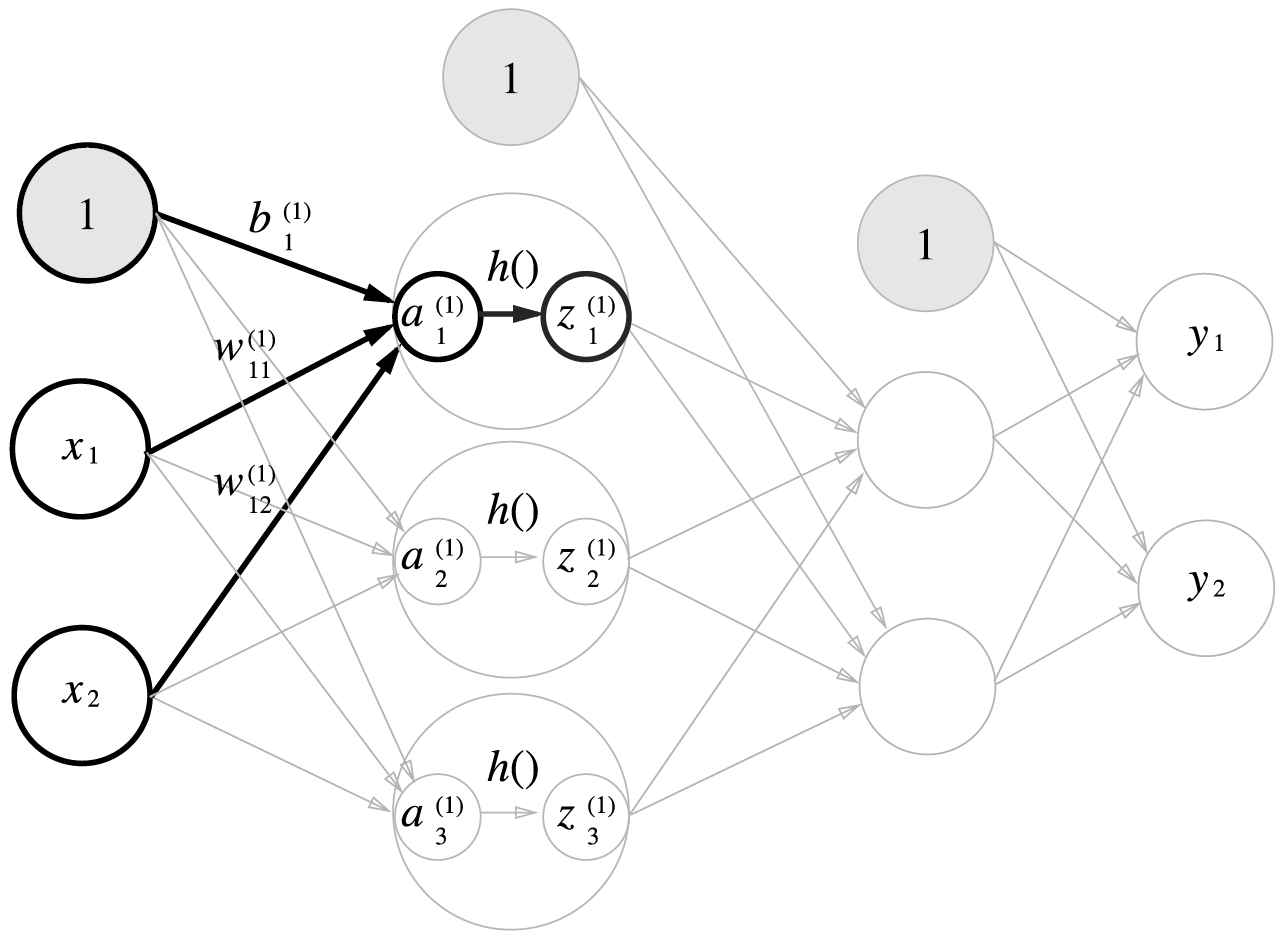

In [ ]:
z1 = sigmoid(A1)

print(z1)

[[0.57444252 0.66818777 0.75026011]]


3-19 1층에서 2층으로의 신호 전달

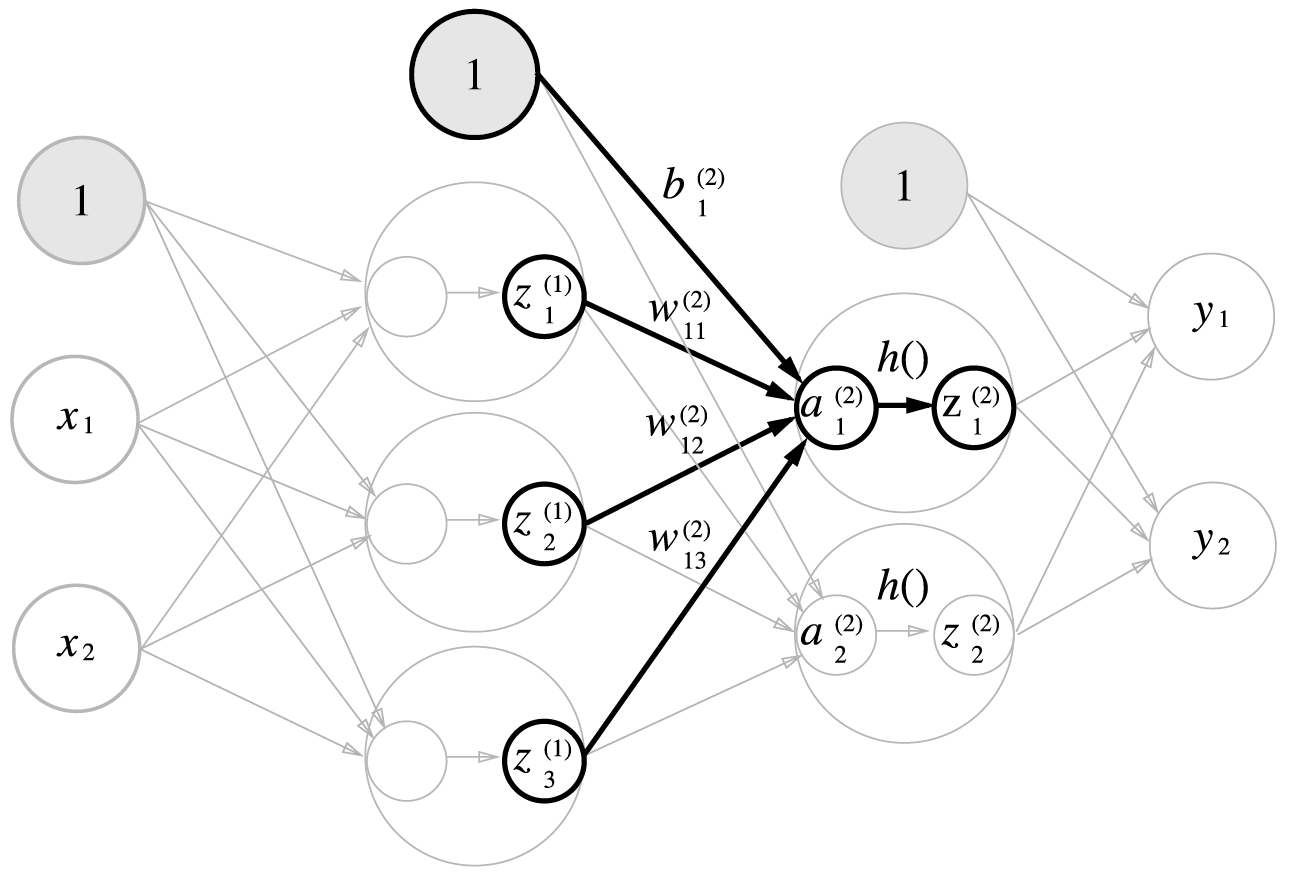

$
\left(\begin{array}{r}
0.57444252&0.66818777&0.75026011
\end{array}\right)
\left(\begin{array}{rrr}
0.1&0.4\\
0.2&0.5\\
0.3&0.6
\end{array}\right)
+
\left(\begin{array}{rrr}
0.1&0.2
\end{array}\right)
=
\left(\begin{array}{rrr}
0.51615984&1.21402696
\end{array}\right)
$

In [ ]:
W2 = np.array([[0.1, 0.4 ], [0.2, 0.5], [0.3, 0.6]])    # (3, 2)
B2 = np.array([[0.1, 0.2]])
print(z1.shape) # (1, 3)
print(W2.shape) # (3, 2)
print(B2.shape) # (1, 2)
A2 = np.dot(z1, W2) + B2
z2 = sigmoid (A2)
print(A2)
print(z2)

(1, 3)
(3, 2)
(1, 2)
[[0.51615984 1.21402696]]
[[0.62624937 0.7710107 ]]


그림 3-20 2층에서 출력층으로 신호 전달

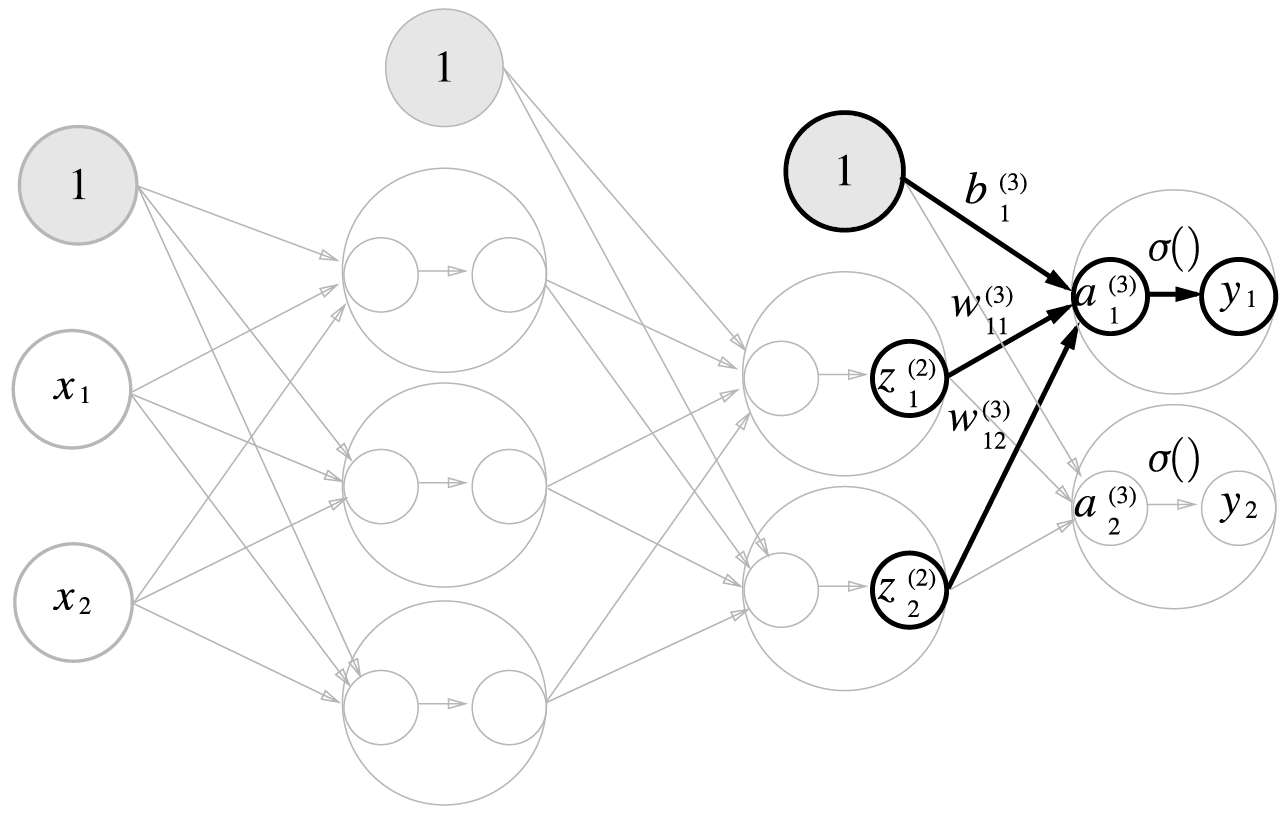

(1,2)(2,2) (1,2)

$
\left(\begin{array}{r}
0.62624937&0.7710107
\end{array}\right)
\left(\begin{array}{rrr}
0.1&0.3\\
0.2&0.4
\end{array}\right)
+
\left(\begin{array}{rrr}
0.1&0.2
\end{array}\right)
=
\left(\begin{array}{rrr}
0.31682708&0.69627909
\end{array}\right)
$

In [ ]:
def identity_function(x): #항등함수: 입력 그대로 출력으로
  return x

W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(z2,W3) + B3
y = identity_function(A3)
print(y)

[[0.31682708 0.69627909]]


###3.4.3 구현 정리

In [ ]:
def init_network():
    network = {}        #dictionary 형태로 wieght와 bias 저장
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([[0.1,0.2,0.3]])
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([[0.1,0.2]])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([[0.1,0.2]])

    return network

def forward(network,x): #구현된 layer를 따라 데이터 진행
    W1,W2,W3 = network['W1'],network['W2'],network['W3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3']

    a1 = np.dot(x,W1) + b1 #첫번째 layer    (1,2)(2,3) -> (1,3)
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2 #두번째 layer      (1,3)(3,2) -> (1,2)
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3 #세번째 마지막 layer       (1,2)(2,2) -> (1,2)
    y = identity_function(a3)

    return y

network = init_network()
x = np.array([[1.0,0.5]])
y = forward(network,x)
print(y)

[[0.31682708 0.69627909]]


##3.5 출력층 설계하기



###3.5.1 항등 함수와 소프트맥스 함수 구현하기

그림 3-21 항등 함수

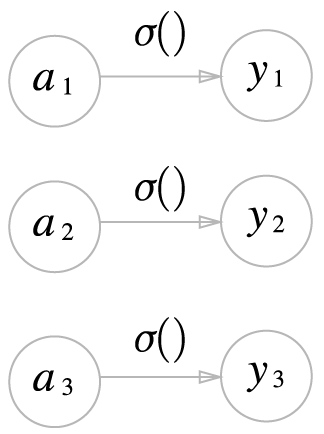

3-22 소프트맥스 함수

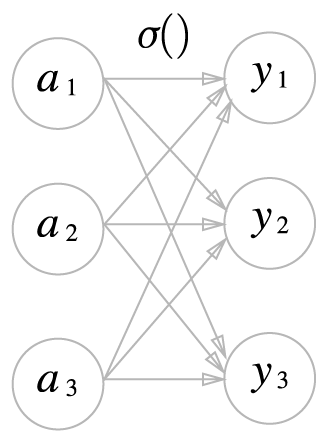

- Softmax


$$y_{k} = {exp(a_{k}) \over \sum_{i=1}^{n} exp(a_{i})}$$

$$y_{k} = {e^{a_{k}} \over \sum_{i=1}^{n} e^{a_{i}}}$$

- 분자 : 입력 a -> e^a
- 분모 : 입력 a -> e^a -> 전체를 더함
- 분자/분모 ---> 0과 1사이의 값으로 변환, 전체 합은 1

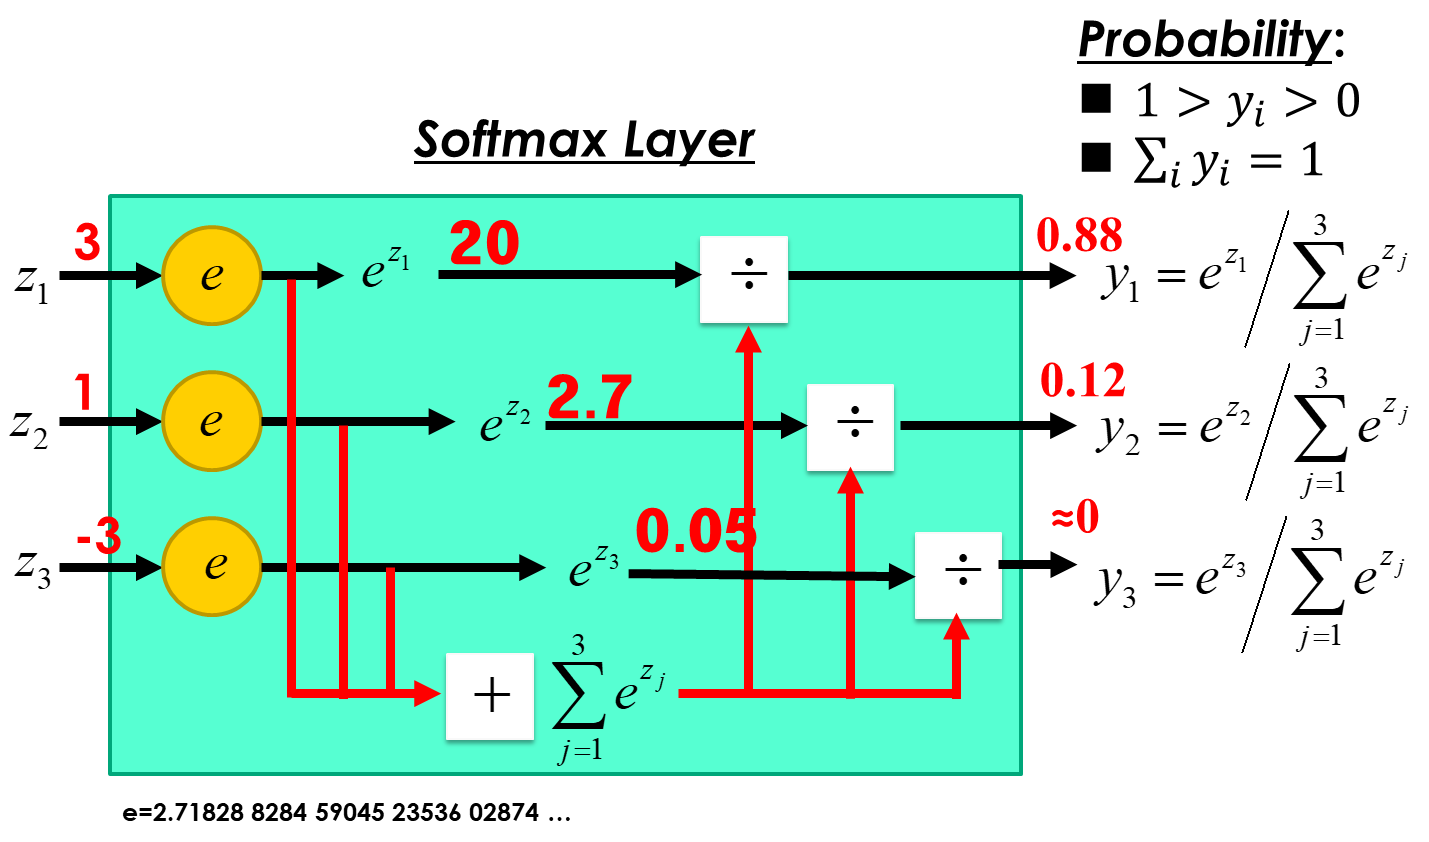

In [ ]:
def softmax(a):
    exp_a = np.exp(a)            # 입력에 자연상수(e)를 밑으로 연산 e^a         (분자)
    sum_exp_a = np.sum(exp_a)    # 자연상수(e)를 밑으로 연산 e^a 후 전체를 더함 (분모)
    y = exp_a / sum_exp_a
    return y

###3.5.2 소프트맥스 함수 구현 시 주의점

- 지수처리 하면 변수 저장 변위를 쉽게 벗어남(overflow)
  - 변수 4byte 또는 8byte
  - e^10   -> 20,000   0x4e20
  - e^100  -> 10^40개, 자리수 40 이상
  - e^1000 -> 무한대처리 inf

- 가장 큰 값으로 빼고 지수 처리하면 overflow를 방지함

- 입력값이 작은 경우 - 정상출력

In [ ]:
#a = np.array([1, 2, 3])
#a = np.array([19, 20, 21])
a = np.array([199, 200, 201])
print('input   :', a)
print('exp     :', np.exp(a))
print('exp sum :', np.sum(np.exp(a)))
print('softmax :', np.exp(a)/np.sum(np.exp(a)))

input   : [199 200 201]
exp     : [2.65828719e+86 7.22597377e+86 1.96422332e+87]
exp sum : 2.9526494146681314e+87
softmax : [0.09003057 0.24472847 0.66524096]


- 입력값이 커지면 overflow

In [ ]:
a = np.array([1010, 1000, 990])
np.exp(a)/np.sum(np.exp(a))

<ipython-input-17-e955eaf93ef6>:2: RuntimeWarning: overflow encountered in exp
  np.exp(a)/np.sum(np.exp(a))
<ipython-input-17-e955eaf93ef6>:2: RuntimeWarning: invalid value encountered in divide
  np.exp(a)/np.sum(np.exp(a))


array([nan, nan, nan])

- 최대값을 구한 후 빼기

In [ ]:
c=np.max(a)
a-c

array([  0, -10, -20])

- overflow 방지

In [ ]:
np.exp(a-c)/np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

- overflow 방지 softmax 함수

In [ ]:
# overflow 방지
def softmax(a):
    c = np.max(a)                 # 배열 a 중 가장 큰 값 선택
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

###3.5.3 소프트맥스 함수의 특징

In [ ]:
a = np.array([0.3,2.9,4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


###3.5.4 출력층의 뉴런 수 정하기

##3.6 손글씨 숫자 인식

###3.6.1 MNIST 데이터셋
Mnist download


그림 3-24 MNIST 이미지 데이터셋의 예

 - 0부터 9까지의 숫자 이미지로 구성
 - 훈련 이미지 60,000장, 시험 이미지 10,000장
 - 훈련 이미지를 사용하여 모델 학습
 - 학습한 모델로 시험 이미지들을 얼마나 정확하게 분류하는지 평가


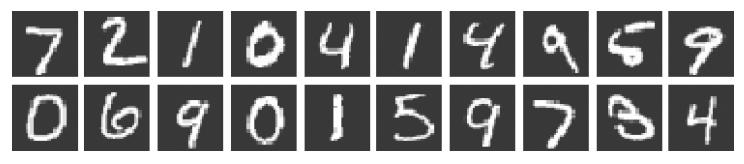

In [ ]:
import tensorflow as tf
(x_train,t_train),(x_test,t_test) = tf.keras.datasets.mnist.load_data()

print(x_train.ndim)
print(x_train.shape)
print(x_train.dtype)

11490434/11490434 [==============================] - 0s 0us/step
3
(60000, 28, 28)
uint8


In [ ]:
x_train = x_train.reshape(60000,-1) #flatten (60000,28,28) - > (60000,784)
x_test = x_test.reshape(10000,-1)
print(x_train.ndim)
print(x_train.shape)
print(x_train.dtype)

print(x_test.ndim)
print(x_test.shape)
print(x_test.dtype)

2
(60000, 784)
uint8
2
(10000, 784)
uint8


In [ ]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [ ]:
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    #pll_img.show()
    display(pil_img) # collab에서 실행가능하게 변경

#img = x_train[0]
#label = t_train[0]
#img = x_train[10]
#label = t_train[10]
img = x_train[20]
label = t_train[20]
print(label)
print(img.shape)
img = img.reshape(28,28) #화면에 출력가능한 원래의 이미지 shape으로 변경
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


- Pickle File


Python Image Library

In [ ]:
import pickle

#pickle file 업로드 필요
#with open("/content/drive/MyDrive/Colab Notebooks/deep_learning_start/sample_weight.pkl", 'rb') as f: #저장된 wieght파일을 불러와 출력
#with open("/content/drive/MyDrive/Colab Notebooks/sample_weight.pkl", 'rb') as f: #저장된 wieght파일을 불러와 출력
with open("/content/sample_weight.pkl", 'rb') as f: #저장된 wieght파일을 불러와 출력
    data = pickle.load(f) #binary 형태로 저장되어 있다가 불러오면서 저장당시 class로 복원
#print(data)
print(f"W1: {data['W1']}") #여기서는 dictionary 형태
print(f"b1: {data['b1']}")


W1: [[-0.00741249 -0.00790439 -0.01307499 ...  0.01978721 -0.04331266
  -0.01350104]
 [-0.01029745 -0.01616653 -0.01228376 ...  0.01920228  0.02809811
   0.01450908]
 [-0.01309184 -0.00244747 -0.0177224  ...  0.00944778  0.01387301
   0.03393568]
 ...
 [ 0.02242565 -0.0296145  -0.06326169 ... -0.01012643  0.01120969
   0.01027199]
 [-0.00761533  0.02028973 -0.01498873 ...  0.02735376 -0.01229855
   0.02407041]
 [ 0.00027915 -0.06848375  0.00911191 ... -0.03183098  0.00743086
  -0.04021148]]
b1: [-0.06750315  0.0695926  -0.02730473  0.02256093 -0.22001474 -0.22038847
  0.04862635  0.13499236  0.23342554 -0.0487357   0.10170191 -0.03076038
  0.15482435  0.05212503  0.06017235 -0.03364862 -0.11218343 -0.26460695
 -0.03323386  0.13610415  0.06354368  0.04679805 -0.01621654 -0.05775835
 -0.03108677  0.10366164 -0.0845938   0.11665157  0.21852103  0.04437255
  0.03378392 -0.01720384 -0.07383765  0.16152057 -0.10621249 -0.01646949
  0.00913961  0.10238428  0.00916639 -0.0564299  -0.10607515  

### 3.6.2 신경망의 추론 처리

- Mnist Test


In [ ]:
import numpy as np
import pickle

def get_data():
    #(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    (x_train,t_train),(x_test,t_test) = tf.keras.datasets.mnist.load_data()
    x_test = x_test.reshape(10000,-1)
    x_test = x_test.astype('float32') / 255. #normalize 데이터를 0과 1사이로
    return x_test, t_test

def init_network():
    #with open("/content/drive/MyDrive/Colab Notebooks/deep_learning_start/sample_weight.pkl", 'rb') as f: #저장된 wieght파일을 불러와 model에 적용
    with open("/content/sample_weight.pkl", 'rb') as f: #저장된 wieght파일을 불러와 model에 적용
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3'] #위와 같은 3층 layer 구현
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1     #(100, 784)(784, 50)  => (100, 50)
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2    # (100, 50)(50, 100)  => (100, 100)
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3    # (100, 100)(100, 10) => (100,10)
    y = softmax(a3)
    return y

x, t = get_data()
network = init_network()
#print(W1.shape)
#print(W2.shape)
#print(W3.shape)

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))
print(x[0].shape)

Accuracy:0.9352
(784,)


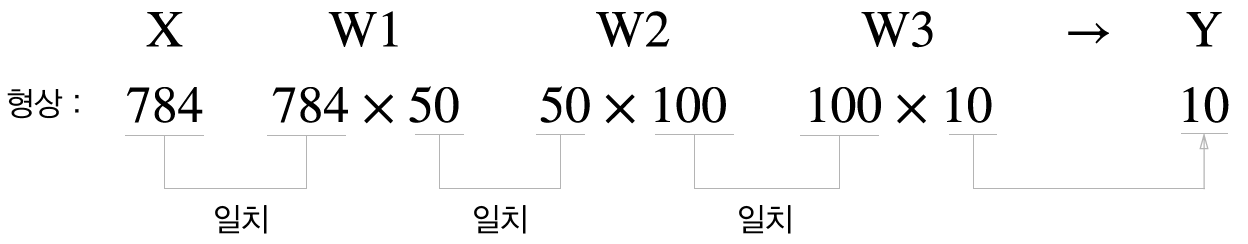

###3.6.3 배치처리
Mnist Batch


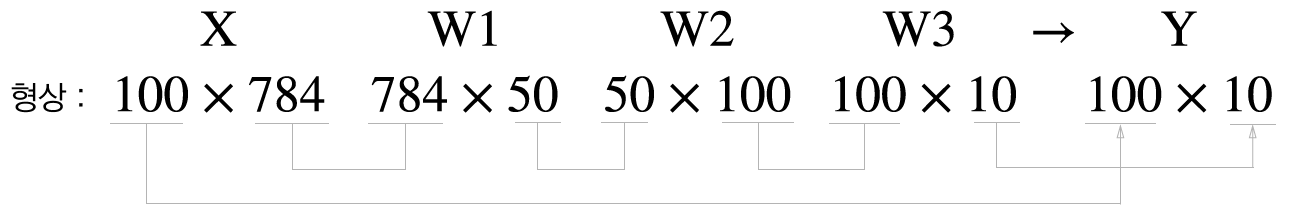

In [ ]:
def get_data():
    #(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    (x_train,t_train),(x_test,t_test) = tf.keras.datasets.mnist.load_data()
    x_test = x_test.reshape(10000,-1)   #
    x_test = x_test.astype('float32') / 255. #normalize 데이터를 0과 1사이로
    return x_test, t_test


def init_network():
    #with open("/content/drive/MyDrive/Colab Notebooks/deep_learning_start/sample_weight.pkl", 'rb') as f:
    with open("/content/sample_weight.pkl", 'rb') as f:
    #with open("/content/drive/MyDrive/data/sample_weight(2).pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size] # 이미지 1개씩이 아닌 batch size만큼의 이미지를 넘겨줘 한번에 연산
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))
print(x[0:0+batch_size].shape)

Accuracy:0.9352
(100, 784)


##3.7 정리

# 행렬

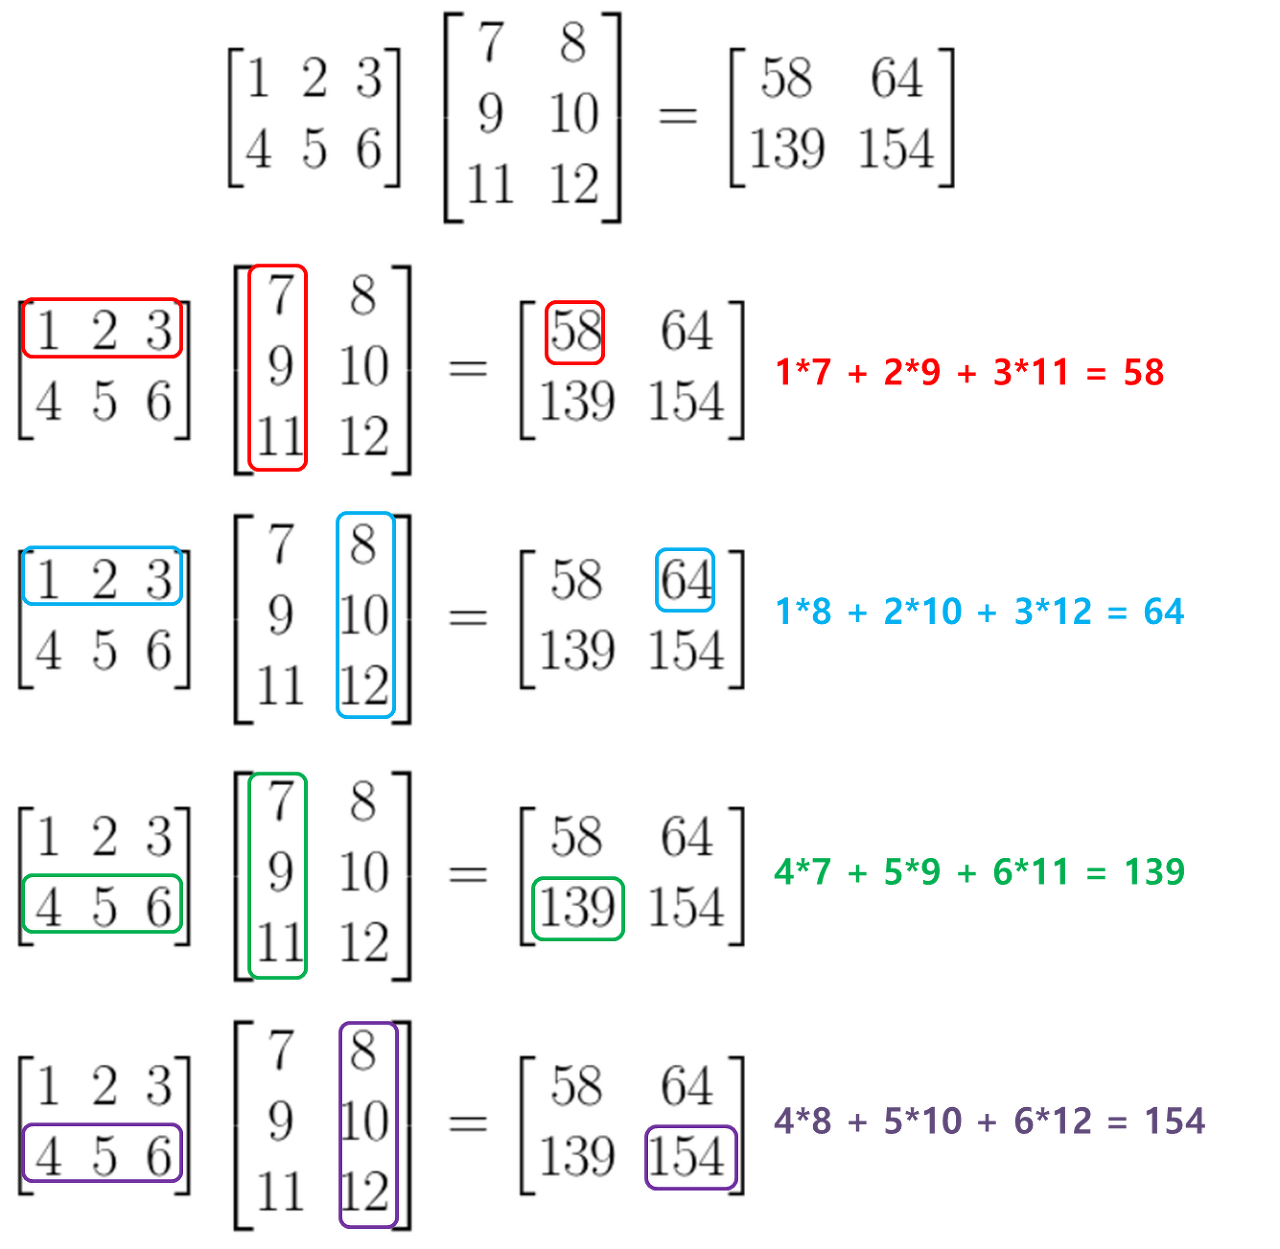

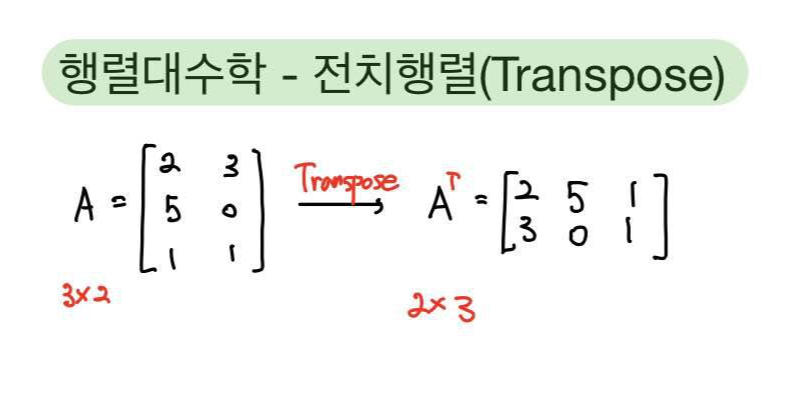

수식 연습

$$\left\{ 2\quad 2\\ 2\quad 2 \right\}$$

$ \begin{bmatrix}
a & b \\\\
c & d
\end{bmatrix}$

- 행렬
$$\left(\begin{array}{rrr}
1&2&3\\
4&5&6\\
7&8&9
\end{array}\right)$$

- 행렬
$$\left[\begin{array}{rrr}
1&2&3\\
4&5&6\\
7&8&9
\end{array}\right]$$

- 행렬곱

$\left(\begin{array}{rrr}
1&2&3\\
4&5&6\\
7&8&9
\end{array}\right)$
$\left(\begin{array}{rrr}
1&2&3\\
4&5&6\\
7&8&9
\end{array}\right)$

- 행렬곱

$$X^i_{j=1} = \left(\begin{array}{rrr}
1&2&3\\
4&5&6\\
7&8&9
\end{array}\right) \left(\begin{array}{rrr}
1&2&3\\
4&5&6\\
7&8&9
\end{array}\right)$$

- 행렬곱

$$X^i_{j=1} = \left(\begin{array}{rrr}
1&2&3\\
4&5&6\\
7&8&9
\end{array}\right.
$$

- 아래첨자와 윗첨자
$$x_i, y_{ij}, x^i, y^{ij}, x^i_{j=1}$$

- 제곱근
$$\sqrt{b^2-4ac}$$

$$\sum^n_{i=1} \left(\frac{x_i}{y_i}\right)$$

$$\int_0^{2\pi} \sin x ~dx$$

$$f(x)= if x < x_{min} : (x/x_{min})^a$$  
$$otherwise : 0$$  
$$P(w)=U(x/2)(7/5)/Z$$  
$$p_{\theta}(x) = \int p_{\theta}(2z)p_{\theta}(y\mid k)dz$$  
$$x = argmax_k((x_t-x_u+x_v)^T*x_m)/(||x_b-x_k+x_l||)$$  

$$\frac{2}{3}$$

$${1&2&3\\
4&5&6\\
7&8&9}$$

$$\begin{CD}
A @>a>> B\\
@V b V V= @VV c V\\
C @>>d> D
\end{CD}$$

In [ ]:
import numpy as np
np.exp(-np.inf)

0.0

In [ ]:
import numpy as np
np.exp(np.inf)

inf

마크다운 참고
https://datastory1.blogspot.com/2017/11/r-markdown_2.html

https://ghdic.github.io/math/default/mathjax-%EB%AC%B8%EB%B2%95/

https://ghdic.github.io/math/default/mathjax-%EB%AC%B8%EB%B2%95/